In [ ]:
import streamlit as st


In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/Colab Notebooks/')
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import pickle

In [31]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crop_Recommendation.csv')


In [32]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [34]:
print("Missing Values in the Dataset:")
print(data.isnull().sum())

Missing Values in the Dataset:
Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64


In [35]:
X = data.drop('Crop', axis=1)
y = data['Crop']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
joblib.dump(model, 'crop_recommendation_model.pkl')
files.download('crop_recommendation_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.96      0.98        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        14
    

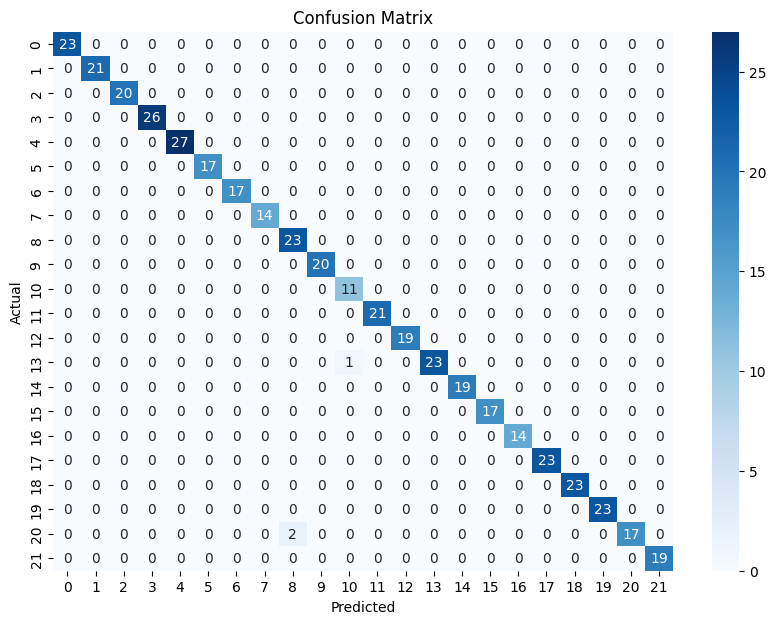

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_test_bin = pd.get_dummies(y_test)
y_prob = model.predict_proba(X_test)

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

for i, crop in enumerate(y_test_bin.columns):
    fpr[crop], tpr[crop], _ = roc_curve(y_test_bin[crop], y_prob[:, i])
    roc_auc[crop] = auc(fpr[crop], tpr[crop])

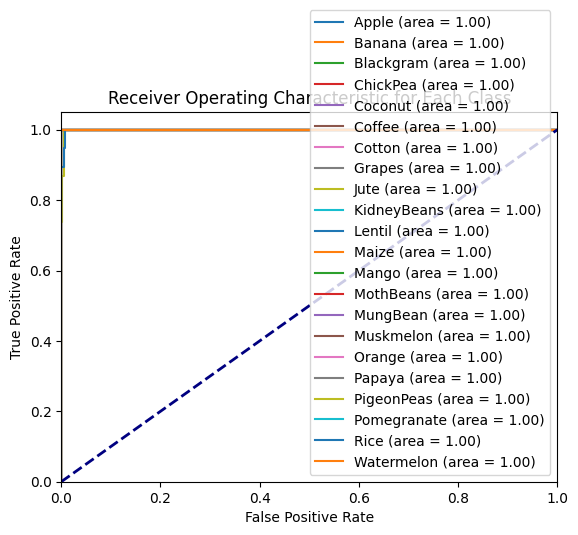

In [ ]:
plt.figure()
for crop in y_test_bin.columns:
    plt.plot(fpr[crop], tpr[crop], label=f'{crop} (area = {roc_auc[crop]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc="lower right")
plt.show()

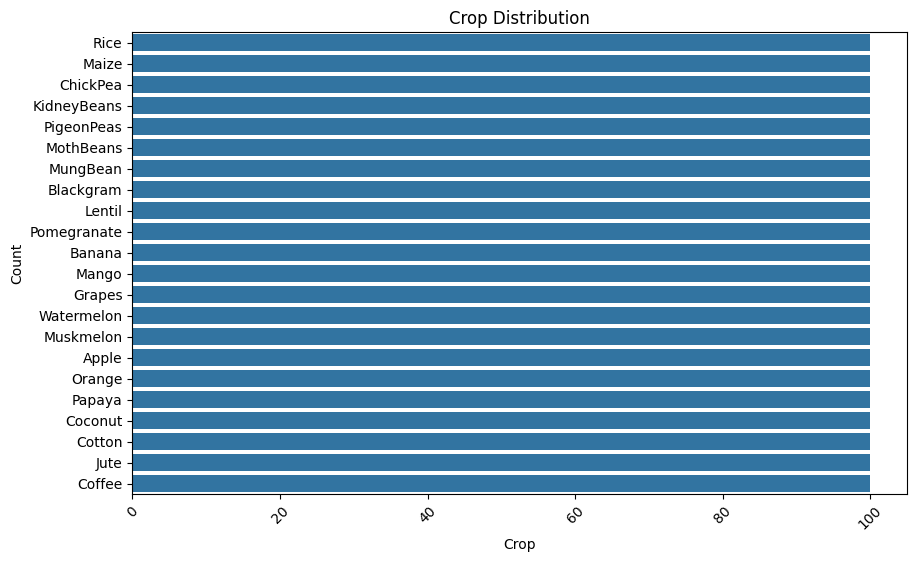

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Crop'])
plt.xticks(rotation=45)
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Crop Distribution')
plt.show()

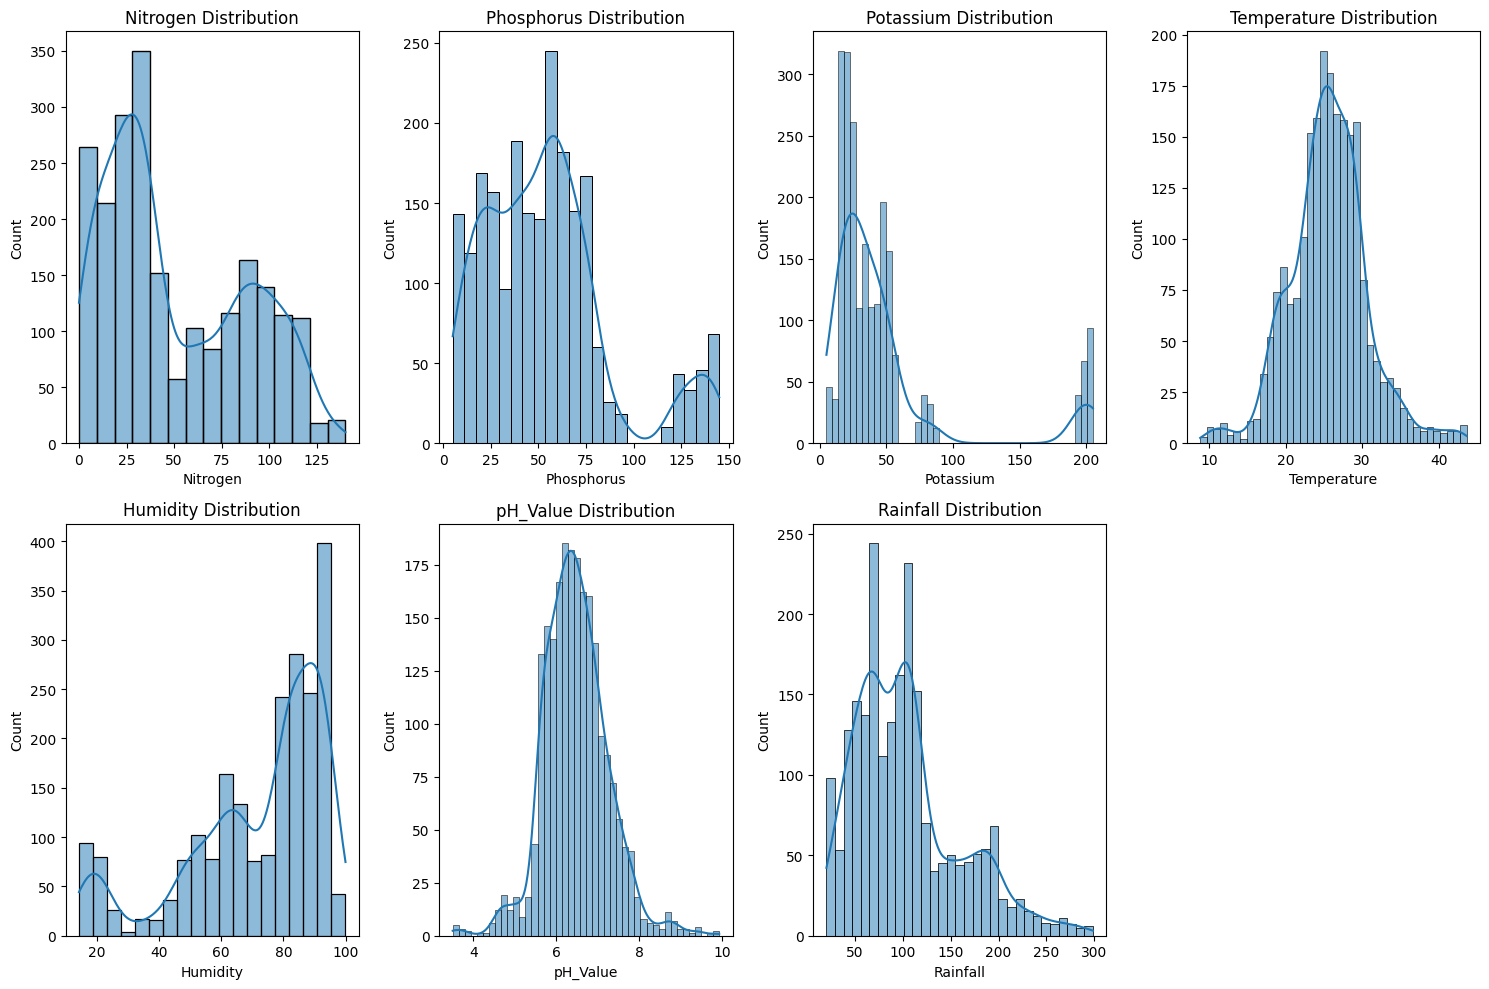

In [ ]:
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()